# Removendo ruído sal-pimenta de uma sinusoide utilizando filtro de Gabor

In [5]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2, ifft2
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

import warnings
import time
from time import clock_gettime as get_time

from skimage.filters import gabor_kernel
from scipy.signal import convolve

In [ ]:
# produz ruido na matriz
def noise(m, num, value = 255):
    h,w = m.shape
    noised = m.copy()
    for i in range(num):
        x = np.random.randint(low=0, high=h-1)
        y = np.random.randint(low=0, high=w-1)
        noised[x,y] = value
    return noised

In [ ]:
# cola uma matriz ao lado de outras
def glue(m_list):
    glued_mtrx = m_list[0]
    amount = len(m_list)
    for i in range(1,amount):
        glued_mtrx = np.concatenate((glued_mtrx, m_list[i]), axis=1)
    return glued_mtrx

Primeiro criamos uma sinusoide e adicionamos ruído artificialmente a ela.

""
""

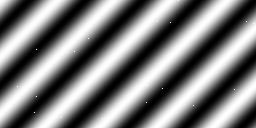

In [91]:
H = 128
W = 256
s = (H,W)
T = 40
theta = 45 * np.pi/180
f = ia.cos(s, T, theta, 0)
f = noise(ia.normalize(f, [0,255]), num= 20, value=255)
ia.adshow(f)

Agora aplicamos o filtro na imagem.

""
""

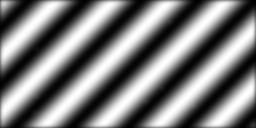

In [93]:
frequency = 1/T
sigma = 2
gabor_filter = np.real(gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma))
mtrx_resp = convolve(in1=f, in2=gabor_filter, method="auto", mode="same")
ia.adshow(ia.normalize(mtrx_resp, [0,255]))

Repare que é essencial sabermos a frequência da imagem que queremos melhorar, pois do contrário obteremos uma matriz de resposta indesejada.

""
""

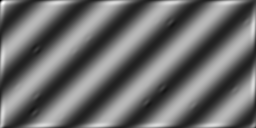

In [94]:
frequency = 1/T + 0.1
sigma = 3
gabor_filter = np.real(gabor_kernel(frequency, theta=theta, sigma_x=sigma, sigma_y=sigma))
mtrx_resp = convolve(in1=f, in2=gabor_filter, method="auto", mode="same")
ia.adshow(ia.normalize(mtrx_resp, [0,255]))